In [95]:
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [96]:
selected_coin = "ethereum"
base_dir = os.path.join("..")
def load_all_data(coin):
    csv_files = glob.glob(os.path.join(base_dir,"Data", coin, f"{'[0-9]'*2}-{'[0-9]'*2}-{'[0-9]'*4} {'[0-9]'*2}:{'[0-9]'*2}:{'[0-9]'*2}", "*.csv"))
    complete_df = pd.DataFrame([])
    df = None
    for i in range(len(csv_files)):
        df = pd.read_csv(csv_files[i])
        df["ts"] = pd.to_datetime(df["ts"], format="%m/%d/%Y %H:%M:%S")
        df["ts"] = df["ts"].dt.tz_localize('America/Bogota')
        df["cpu_load"] = df["cpu_load"] / 100
        df["gpu_memory_usage"] = df["gpu_memory_usage"] * 2**20
        complete_df = pd.concat([complete_df, df])
        
    return complete_df

df_coin = load_all_data(selected_coin)

df_coin = df_coin.sort_values("ts")

In [97]:
def load_power_data():
    power_file = glob.glob(os.path.join(base_dir, "Data", "data-export-*", "*_1-15MIN.csv"))[0]
    df = pd.read_csv(power_file)
    df["Power"] = df["SmartPlug 1_1 (kWatts)"] * 1000
    df["Energy"] = df["Power"] * 1/(60**2)
    df["ts"] = pd.to_datetime(df["Time Bucket (America/New_York)"], format="%m/%d/%Y %H:%M:%S")
    df["ts"] = df["ts"].dt.tz_localize('America/New_York')
    df.drop(columns=["Time Bucket (America/New_York)", "SmartPlug 1_1 (kWatts)"], inplace=True)
    return df
    
df_power = load_power_data()

df_power = df_power[(df_coin["ts"].min()<=df_power["ts"]) & (df_power["ts"]<=df_coin["ts"].max())]

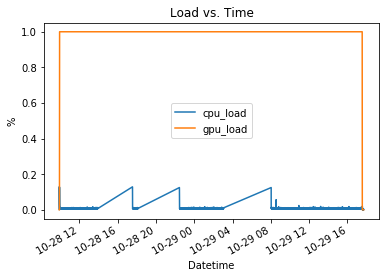

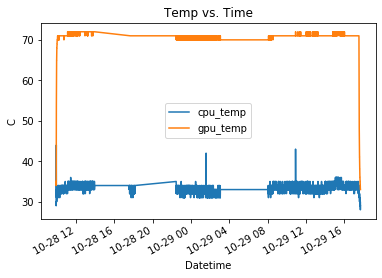

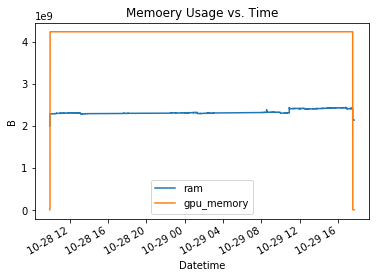

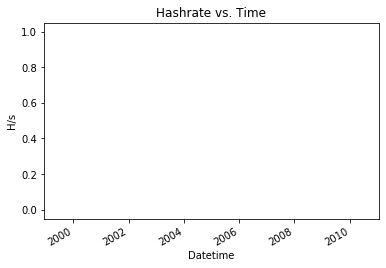

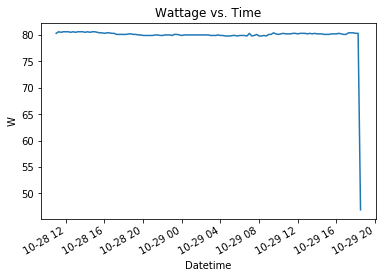

In [98]:
plt.plot(df_coin["ts"].dt.to_pydatetime(), df_coin["cpu_load"], label="cpu_load")
plt.plot(df_coin["ts"].dt.to_pydatetime(), df_coin["gpu_load"], label="gpu_load")
plt.legend()
plt.ylabel("%")
plt.xlabel("Datetime")
plt.title("Load vs. Time")
plt.gcf().autofmt_xdate()
plt.show()
plt.plot(df_coin["ts"].dt.to_pydatetime(), df_coin["cpu_temp"], label="cpu_temp")
plt.plot(df_coin["ts"].dt.to_pydatetime(), df_coin["gpu_temp"], label="gpu_temp")
plt.legend()
plt.ylabel("C")
plt.xlabel("Datetime")
plt.title("Temp vs. Time")
plt.gcf().autofmt_xdate()
plt.show()
plt.plot(df_coin["ts"].dt.to_pydatetime(), df_coin["memory_usage"], label="ram")
plt.plot(df_coin["ts"].dt.to_pydatetime(), df_coin["gpu_memory_usage"], label="gpu_memory")
plt.legend()
plt.ylabel("B")
plt.xlabel("Datetime")
plt.title("Memoery Usage vs. Time")
plt.gcf().autofmt_xdate()
plt.show()

plt.plot(df_coin["ts"].dt.to_pydatetime(), df_coin["hashrate"])
plt.ylabel("H/s")
plt.xlabel("Datetime")
plt.title("Hashrate vs. Time")
plt.gcf().autofmt_xdate()
plt.show()


plt.plot(df_power["ts"].dt.to_pydatetime(), df_power["Power"])
plt.ylabel("W")
plt.xlabel("Datetime")
plt.title("Wattage vs. Time")
plt.gcf().autofmt_xdate()
plt.show()